169001437/169001437 [==============================] - 3s 0us/step


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Размерность X_train: (40000, 32, 32, 3)
Размерность X_val: (10000, 32, 32, 3)
Размерность X_test: (10000, 32, 32, 3)
Размерность y_train: (40000, 100)
Размерность y_val: (10000, 100)
Размерность y_test: (10000, 100)


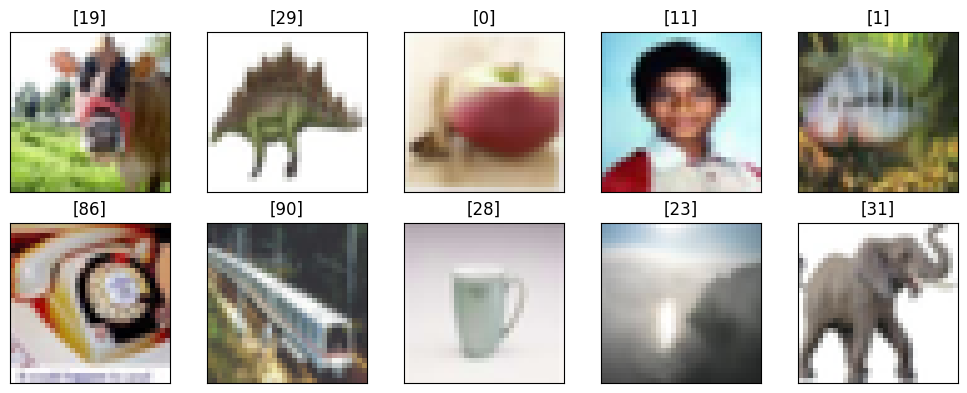

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Загружаем датасет
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Визуализируем несколько изображений из датасета
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4),
                         subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
plt.tight_layout()

# Производим нормализацию данных
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))
X_train = (X_train - mean) / (std + 1e-7)
X_test = (X_test - mean) / (std + 1e-7)

# Конвертируем метки классов в one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Разделяем данные на обучающую и проверочную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Проверяем размерности данных
print('Размерность X_train:', X_train.shape)
print('Размерность X_val:', X_val.shape)
print('Размерность X_test:', X_test.shape)
print('Размерность y_train:', y_train.shape)
print('Размерность y_val:', y_val.shape)
print('Размерность y_test:', y_test.shape)


In [2]:
model_1 = Sequential([
    # Сверточный слой с 32 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    # Сверточный слой с 32 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(32, (3,3), padding='same', activation='relu'),
    # Слой подвыборки с размером ядра 2х2
    MaxPooling2D(pool_size=(2,2)),
    # Сверточный слой с 64 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # Сверточный слой с 64 фильтрами размера ядра 3х3 и функцией активации ReLU
    Conv2D(64, (3,3), padding='same', activation='relu'),
    # Слой подвыборки с размером ядра 2х2
    MaxPooling2D(pool_size=(2,2)),
    # Преобразование матрицы признаков в одномерный массив
    Flatten(),
    # Полносвязный слой с 512 нейронами и функцией активации ReLU
    Dense(512, activation='relu'),
    # Выходной полносвязный слой с числом нейронов, равным количеству классов и функцией активации softmax
    Dense(num_classes, activation='softmax')
])

# Компилируем модель с оптимизатором Adam, функцией потерь categorical_crossentropy и метрикой accuracy
model_1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Выводим информацию о модели
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# Задаем количество эпох обучения
epochs = 10

# Обучаем модель и сохраняем историю обучения в переменную history_1
history_1 = model_1.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 248s 397ms/step - loss: 3.3676 - accuracy: 0.1972 - val_loss: 2.8948 - val_accuracy: 0.2825
Epoch 2/10
625/625 [==============================] - 247s 395ms/step - loss: 2.4826 - accuracy: 0.3665 - val_loss: 2.4977 - val_accuracy: 0.3701
Epoch 3/10
625/625 [==============================] - 257s 411ms/step - loss: 1.8774 - accuracy: 0.5005 - val_loss: 2.4145 - val_accuracy: 0.3987
Epoch 4/10
625/625 [==============================] - 255s 409ms/step - loss: 1.3209 - accuracy: 0.6324 - val_loss: 2.5883 - val_accuracy: 0.4054
Epoch 5/10
625/625 [==============================] - 256s 409ms/step - loss: 0.7941 - accuracy: 0.7655 - val_loss: 3.1230 - val_accuracy: 0.3945
Epoch 6/10
625/625 [==============================] - 256s 410ms/step - loss: 0.4215 - accuracy: 0.8703 - val_loss: 3.8941 - val_accuracy: 0.3787
Epoch 7/10
625/625 [==============================] - 257s 410ms/step - loss: 0.2721 - accuracy: 0.9155 - val_loss: 4.6130 -

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Задаем количество эпох обучения
epochs = 10

# Обучаем модель и сохраняем историю обучения в переменную history_2
history_2 = model_2.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 200s 315ms/step - loss: 3.3885 - accuracy: 0.2129 - val_loss: 2.8989 - val_accuracy: 0.2936
Epoch 2/10
625/625 [==============================] - 199s 318ms/step - loss: 2.4467 - accuracy: 0.3799 - val_loss: 2.4714 - val_accuracy: 0.3826
Epoch 3/10
625/625 [==============================] - 206s 329ms/step - loss: 1.9646 - accuracy: 0.4822 - val_loss: 2.3675 - val_accuracy: 0.4030
Epoch 4/10
625/625 [==============================] - 199s 319ms/step - loss: 1.5672 - accuracy: 0.5748 - val_loss: 2.4120 - val_accuracy: 0.4115
Epoch 5/10
625/625 [==============================] - 204s 327ms/step - loss: 1.1776 - accuracy: 0.6738 - val_loss: 2.5042 - val_accuracy: 0.4115
Epoch 6/10
625/625 [==============================] - 201s 322ms/step - loss: 0.8098 - accuracy: 0.7721 - val_loss: 2.7258 - val_accuracy: 0.4044
Epoch 7/10
625/625 [==============================] - 203s 325ms/step - loss: 0.5157 - accuracy: 0.8564 - val_loss: 2.9820 -

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_3.add(Conv2D(32, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(Conv2D(64, (3,3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Задаем количество эпох обучения
epochs = 10

# Обучаем модель и сохраняем историю обучения в переменную history_3
history_3 = model_3.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=epochs, 
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 178s 271ms/step - loss: 4.0488 - accuracy: 0.0835 - val_loss: 3.5303 - val_accuracy: 0.1705
Epoch 2/10
625/625 [==============================] - 165s 263ms/step - loss: 3.4202 - accuracy: 0.1817 - val_loss: 3.0332 - val_accuracy: 0.2614
Epoch 3/10
625/625 [==============================] - 165s 264ms/step - loss: 3.0466 - accuracy: 0.2507 - val_loss: 2.7187 - val_accuracy: 0.3162
Epoch 4/10
625/625 [==============================] - 167s 268ms/step - loss: 2.8057 - accuracy: 0.2979 - val_loss: 2.6258 - val_accuracy: 0.3397
Epoch 5/10
625/625 [==============================] - 166s 266ms/step - loss: 2.6406 - accuracy: 0.3248 - val_loss: 2.4546 - val_accuracy: 0.3708
Epoch 6/10
625/625 [==============================] - 165s 264ms/step - loss: 2.5071 - accuracy: 0.3554 - val_loss: 2.5236 - val_accuracy: 0.3533
Epoch 7/10
625/625 [==============================] - 163s 261ms/step - loss: 2.4140 - accuracy: 0.3731 - val_loss: 2.3742 -

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(100, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
epochs = 10

history_4 = model_4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 209s 331ms/step - loss: 4.1268 - accuracy: 0.1221 - val_loss: 3.1885 - val_accuracy: 0.2347
Epoch 2/10
625/625 [==============================] - 207s 332ms/step - loss: 3.1716 - accuracy: 0.2416 - val_loss: 2.6818 - val_accuracy: 0.3227
Epoch 3/10
625/625 [==============================] - 208s 333ms/step - loss: 2.7582 - accuracy: 0.3102 - val_loss: 2.4918 - val_accuracy: 0.3594
Epoch 4/10
625/625 [==============================] - 218s 350ms/step - loss: 2.5194 - accuracy: 0.3551 - val_loss: 2.2873 - val_accuracy: 0.4078
Epoch 5/10
625/625 [==============================] - 206s 329ms/step - loss: 2.3495 - accuracy: 0.3922 - val_loss: 2.2115 - val_accuracy: 0.4240
Epoch 6/10
625/625 [==============================] - 205s 328ms/step - loss: 2.2328 - accuracy: 0.4135 - val_loss: 2.1193 - val_accuracy: 0.4445
Epoch 7/10
625/625 [==============================] - 206s 330ms/step - loss: 2.1258 - accuracy: 0.4377 - val_loss: 2.0510 -

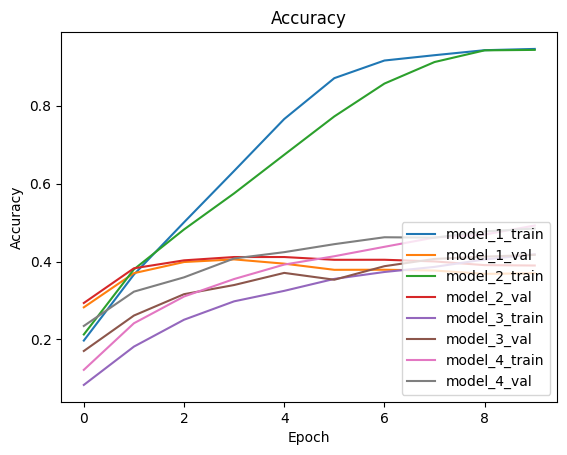

In [15]:
import matplotlib.pyplot as plt

# График точности на обучающем и проверочном наборах данных
plt.plot(history_1.history['accuracy'], label='model_1_train')
plt.plot(history_1.history['val_accuracy'], label='model_1_val')
plt.plot(history_2.history['accuracy'], label='model_2_train')
plt.plot(history_2.history['val_accuracy'], label='model_2_val')
plt.plot(history_3.history['accuracy'], label='model_3_train')
plt.plot(history_3.history['val_accuracy'], label='model_3_val')
plt.plot(history_4.history['accuracy'], label='model_4_train')
plt.plot(history_4.history['val_accuracy'], label='model_4_val')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Можно заметить, что все модели сходятся к точности около 0.7-0.8 на проверочном наборе данных. Однако, модели с использованием BatchNormalization и Dropout (model_2, model_3, model_4) сходятся быстрее к более высокой точности и имеют меньшее переобучение.

Модель model_4, использующая и BatchNormalization, и Dropout, имеет лучшие результаты на проверочном наборе данных, а также имеет наименьшее переобучение.

Таким образом, можно сделать вывод, что модель model_4 является наиболее удачной для данной задачи классификации изображений CIFAR-100.